# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [116]:
import requests
import json


cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all') # ver todas as moedas
#cotacoes = requests.get('https://economia.awesomeapi.com.br/json/last/USD') # especificar quais moedas
cotacoes
# RESPONSE [200] Significa que funcionou e foi encontrado as moedas que está pesquisando


<Response [200]>

In [117]:
cotacoes_dic = cotacoes.json()  # as informações que vem de API geralmente são no formato .Json
cotacoes_dic

{'USD': {'code': 'USD',
  'codein': 'BRL',
  'name': 'Dólar Americano/Real Brasileiro',
  'high': '5.2387',
  'low': '5.2387',
  'varBid': '0.0021',
  'pctChange': '0.04',
  'bid': '5.2382',
  'ask': '5.2392',
  'timestamp': '1656417461',
  'create_date': '2022-06-28 08:57:41'},
 'USDT': {'code': 'USD',
  'codein': 'BRLT',
  'name': 'Dólar Americano/Real Brasileiro Turismo',
  'high': '5.25',
  'low': '5.25',
  'varBid': '0',
  'pctChange': '0',
  'bid': '5.09',
  'ask': '5.41',
  'timestamp': '1656413580',
  'create_date': '2022-06-28 07:53:00'},
 'CAD': {'code': 'CAD',
  'codein': 'BRL',
  'name': 'Dólar Canadense/Real Brasileiro',
  'high': '4.0866',
  'low': '4.0667',
  'varBid': '0.0133',
  'pctChange': '0.33',
  'bid': '4.0774',
  'ask': '4.0794',
  'timestamp': '1656417461',
  'create_date': '2022-06-28 08:57:41'},
 'GBP': {'code': 'GBP',
  'codein': 'BRL',
  'name': 'Libra Esterlina/Real Brasileiro',
  'high': '6.4391',
  'low': '6.4067',
  'varBid': '-0.0124',
  'pctChange': '

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

bid é o valor de compra, é esse o parâmetro para saber a cotação da moeda.


In [119]:
cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
print(f'Dólar {cotacoes_dic["USD"]["bid"]}')
print(f'Euro {cotacoes_dic["EUR"]["bid"]}')
print(f'BitCoin {cotacoes_dic["BTC"]["bid"]}')


Dólar 5.2382
Euro 5.5342
BitCoin 110.037


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [121]:
cotacoes_dolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_dic = cotacoes_dolar_30d.json()

cotacoes_dolar_dic


[{'code': 'USD',
  'codein': 'BRL',
  'name': 'Dólar Americano/Real Brasileiro',
  'high': '5.2387',
  'low': '5.2387',
  'varBid': '0.0021',
  'pctChange': '0.04',
  'bid': '5.2382',
  'ask': '5.2392',
  'timestamp': '1656417376',
  'create_date': '2022-06-28 08:56:16'},
 {'high': '5.2387',
  'low': '5.2387',
  'varBid': '0.0021',
  'pctChange': '0.04',
  'bid': '5.2382',
  'ask': '5.2392',
  'timestamp': '1656374346'},
 {'high': '5.2757',
  'low': '5.203',
  'varBid': '0.0017',
  'pctChange': '0.03',
  'bid': '5.2417',
  'ask': '5.2429',
  'timestamp': '1656104396'},
 {'high': '5.2757',
  'low': '5.203',
  'varBid': '0.0028',
  'pctChange': '0.05',
  'bid': '5.2429',
  'ask': '5.2439',
  'timestamp': '1656104375'},
 {'high': '5.242',
  'low': '5.2393',
  'varBid': '-0.0013',
  'pctChange': '-0.02',
  'bid': '5.2388',
  'ask': '5.2398',
  'timestamp': '1656028736'},
 {'high': '5.1954',
  'low': '5.1944',
  'varBid': '0.001',
  'pctChange': '0.02',
  'bid': '5.1945',
  'ask': '5.1955',

In [122]:
lista_cotacoes_dolar = [item['bid'] for item in cotacoes_dolar_dic]
print(lista_cotacoes_dolar)

# ficou em string

['5.2382', '5.2382', '5.2417', '5.2429', '5.2388', '5.1945', '5.1252', '5.1885', '5.1525', '5.1533', '5.0535', '5.0558', '5.117', '5.1146', '4.9868', '4.9855', '4.9043', '4.895', '4.8707', '4.7953', '4.776', '4.776', '4.7965', '4.8161', '4.7314', '4.7535', '4.7295', '4.7624', '4.8238', '4.8191']


In [123]:
lista_cotacoes_dolar = [float(item['bid']) for item in cotacoes_dolar_dic]
print(lista_cotacoes_dolar)

[5.2382, 5.2382, 5.2417, 5.2429, 5.2388, 5.1945, 5.1252, 5.1885, 5.1525, 5.1533, 5.0535, 5.0558, 5.117, 5.1146, 4.9868, 4.9855, 4.9043, 4.895, 4.8707, 4.7953, 4.776, 4.776, 4.7965, 4.8161, 4.7314, 4.7535, 4.7295, 4.7624, 4.8238, 4.8191]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [146]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()
print(cotacoes_btc_dic)

[{'code': 'BTC', 'codein': 'BRL', 'name': 'Bitcoin/Real Brasileiro', 'high': '80000', 'low': '78000', 'varBid': '1304', 'pctChange': '1.67', 'bid': '79401.1', 'ask': '79405', 'timestamp': '1604188712', 'create_date': '2020-10-31 20:58:32'}]


O código apesar de escrito conforme a documentação da API, não retorna todos os dados, só retornou um valor.
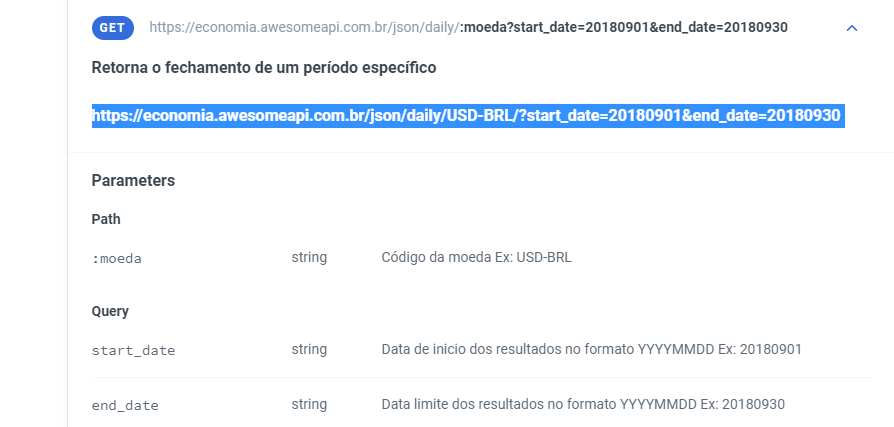

Na documentação do API, mais abaixo existe um outro código que pode ajudar na busca de cotação de períodos antigos:

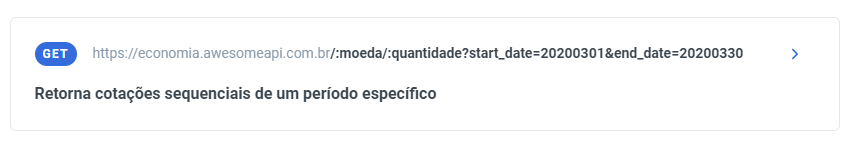

assim, podemos colocar uma quantidade de cotações que queremos exibir


In [148]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/400?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
print(len(cotacoes_btc_dic))
print(lista_cotacoes_btc)

302
[79401.1, 78101.0, 77950.2, 76550.1, 77888.1, 73685.5, 73200.0, 73300.0, 72202.4, 72251.2, 71401.0, 66952.4, 66000.3, 64950.1, 64500.0, 64400.0, 65000.0, 64100.6, 63601.7, 63558.3, 62701.0, 62747.2, 61960.0, 61211.5, 60265.0, 59801.0, 60210.3, 60569.2, 60018.1, 60512.5, 60390.7, 60950.1, 60995.0, 60600.1, 59638.4, 59720.5, 59845.0, 59501.1, 57884.0, 57880.5, 57050.6, 59100.0, 59750.0, 59285.0, 57807.2, 58250.0, 57700.0, 56908.9, 55566.0, 55856.7, 55821.2, 55511.0, 55059.1, 54348.3, 55102.2, 55550.3, 54555.7, 56500.0, 55336.6, 61939.0, 64900.0, 64200.0, 63350.9, 62700.0, 63016.2, 63599.9, 64655.2, 63606.0, 66360.9, 66100.0, 66112.0, 65657.4, 66655.0, 65800.0, 66453.3, 67501.0, 64270.3, 64280.0, 63905.0, 63210.3, 63120.0, 62300.0, 65303.8, 63700.0, 63715.0, 63140.0, 63302.0, 61902.2, 59951.0, 59800.0, 58296.3, 61298.1, 58950.0, 57330.0, 57490.0, 56161.0, 55300.0, 50402.0, 50400.2, 49951.1, 49850.0, 49321.0, 49143.0, 49516.5, 49680.0, 49651.8, 49702.1, 49320.0, 49868.0, 50073.4, 50041

#### Gráfico com as cotações do BitCoin

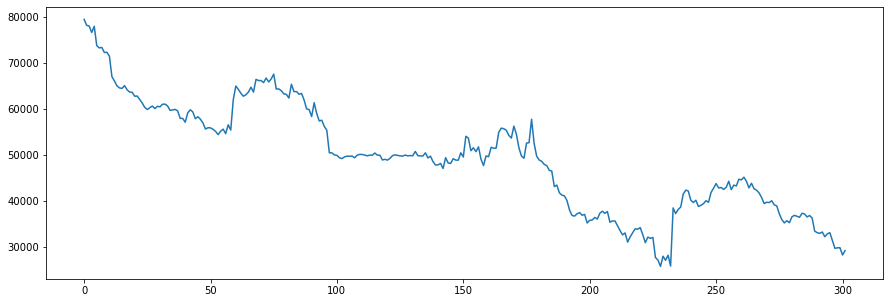

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)

plt.show()

Nota-se que as cotações na lista foram dadas pelas datas mais atuais, ou seja, a evolução do gráfico tá 'voltando no tempo'

É necessário ordenar os dados de forma reversa

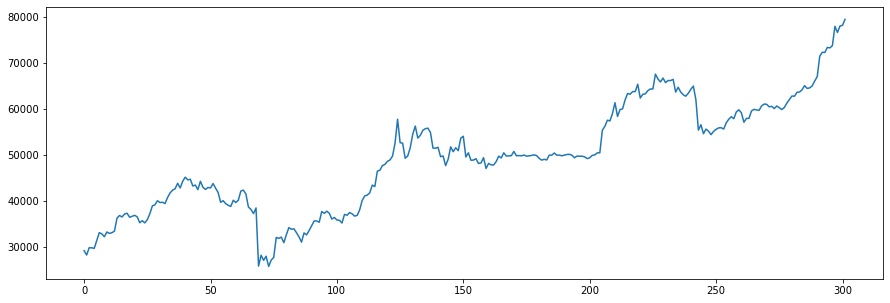

In [153]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/400?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)

plt.show()

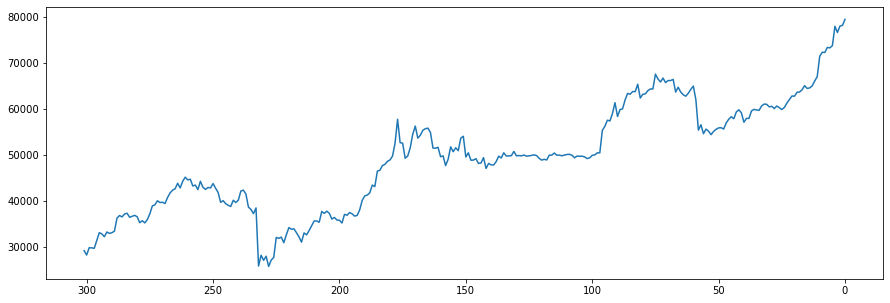

In [181]:
cotacoes_btc = requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/400?start_date=20200101&end_date=20201031')
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid']) for item in cotacoes_btc_dic]

plt.figure(figsize=(15,5))

plt.gca().invert_xaxis()  # inverte o gráfico no eixo X

plt.plot(lista_cotacoes_btc)

plt.show()